In [2]:
library(tidyverse) 
library(fpp3)
library(rio) 

### MA

In [3]:
set.seed(666)
data = tibble(y = arima.sim(n = 1000, model = list(ma = 0.9)))

In [7]:
# months(1:1000)

In [8]:
data$date = yearmonth(ymd('2000-12-01') + months(1:1000))
data

y,date
<ts>,<mth>
2.69233461,2001 Jan
1.45778474,2001 Feb
1.70854683,2001 Mar
-0.39152339,2001 Apr
-1.23679083,2001 May
-0.62362870,2001 Jun
-1.97808630,2001 Jul
-2.51450845,2001 Aug
-1.65504921,2001 Sep


In [9]:
data = as_tsibble(data, index = date)

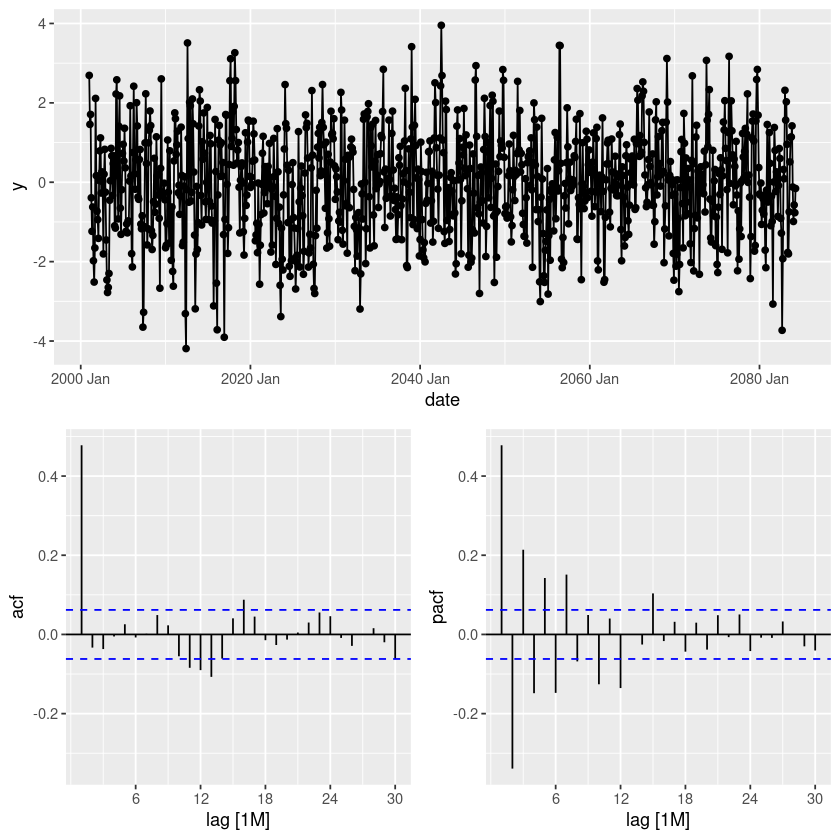

In [11]:
gg_tsdisplay(data, y, plot_type = 'partial')

In [ ]:
ACF(data, y)

ACF(data, y) %>% autoplot()

PACF(data, y)

PACF(data, y) %>% autoplot()


### AR

In [12]:
set.seed(5555)
data = tibble(a = arima.sim(n = 100,
                    model = list(ar = 0.99)),
              b = arima.sim(n = 100,
                    model = list(ar = c(0.9,-0.3,0.1))),
      c = cumsum(rnorm(n = 100, mean = 0, sd = 1)))
data$year = 2001:2100
data = as_tsibble(data, index = year)

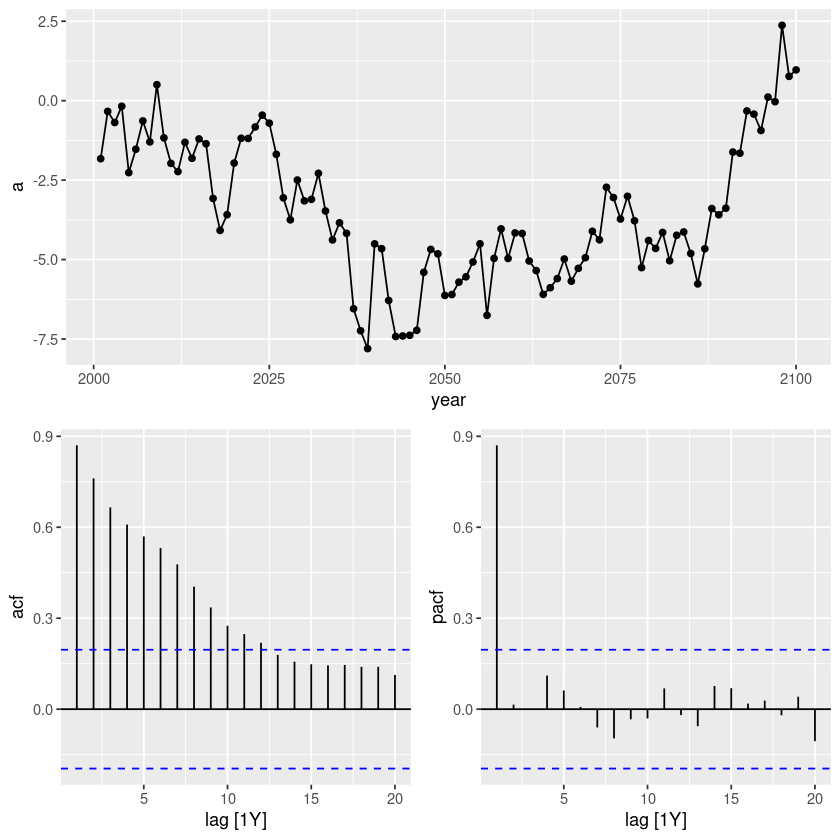

In [13]:
gg_tsdisplay(data, a, plot_type = 'partial')

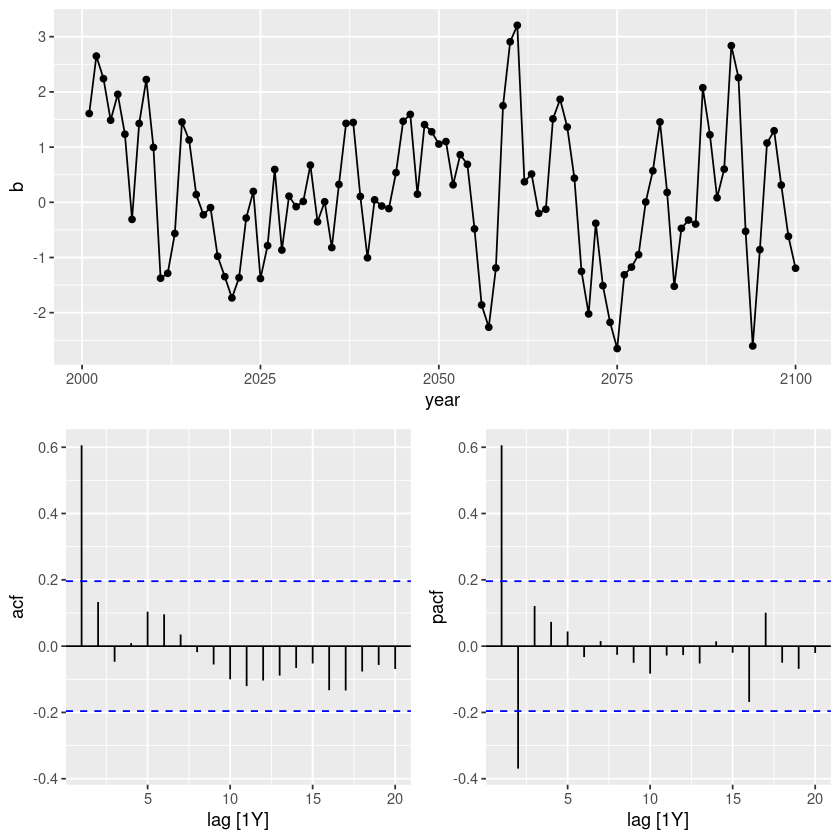

In [15]:
gg_tsdisplay(data, b, plot_type = 'partial')

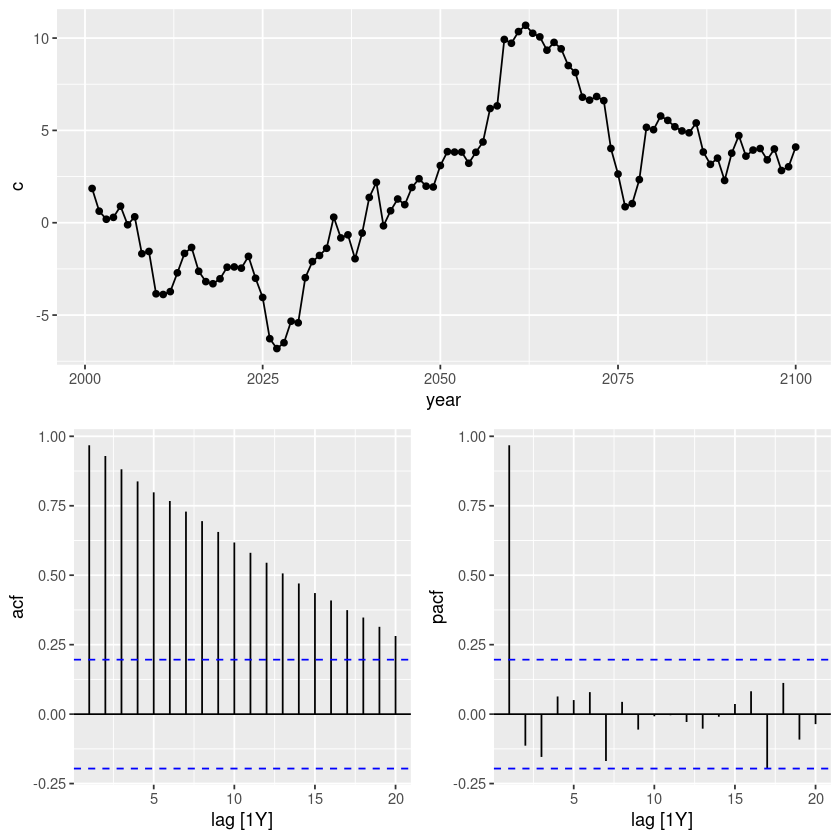

In [16]:
gg_tsdisplay(data, c, plot_type = 'partial')

In [17]:
train = filter(data, year < 2081)

In [25]:
mod_b = model(train, ar1 = ARIMA(b ~ pdq(1, 0, 0)),
              ari = ARIMA(b ~ pdq(1, 1, 0)),
              ar3 = ARIMA(b ~ pdq(3, 0, 0)),
              naive = NAIVE(b))

mod_c = model(train, ar1 = ARIMA(c ~ pdq(1, 0, 0)),
              ari = ARIMA(c ~ pdq(1, 1, 0)),
              ar3 = ARIMA(c ~ pdq(3, 0, 0)),
              naive = NAIVE(c))
              

In [26]:
fb <- forecast(mod_b, h = 20)
fc <- forecast(mod_c, h = 20)

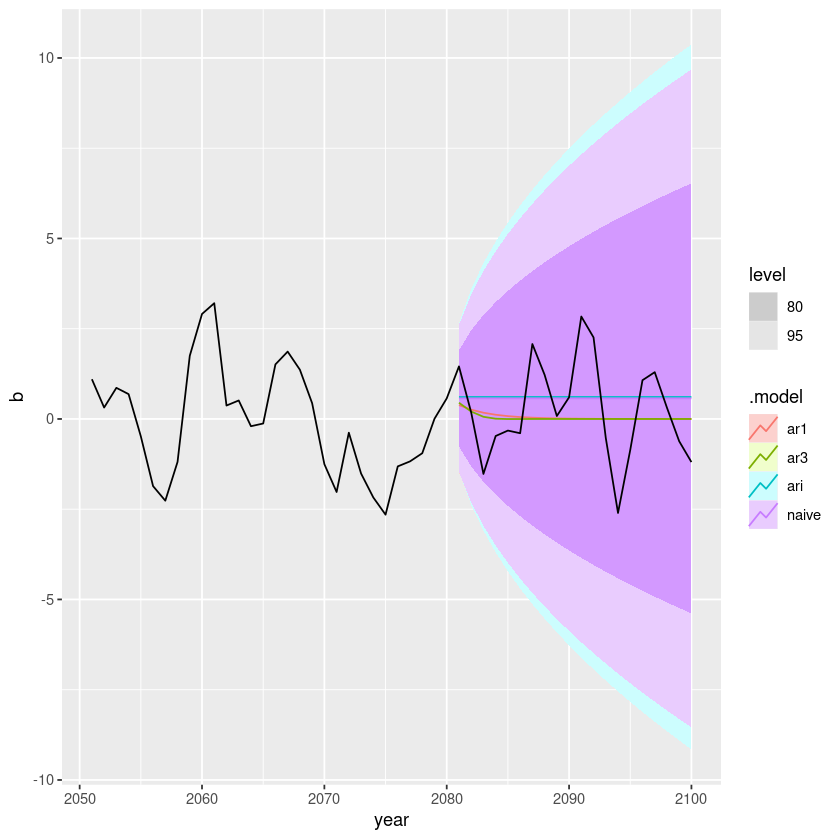

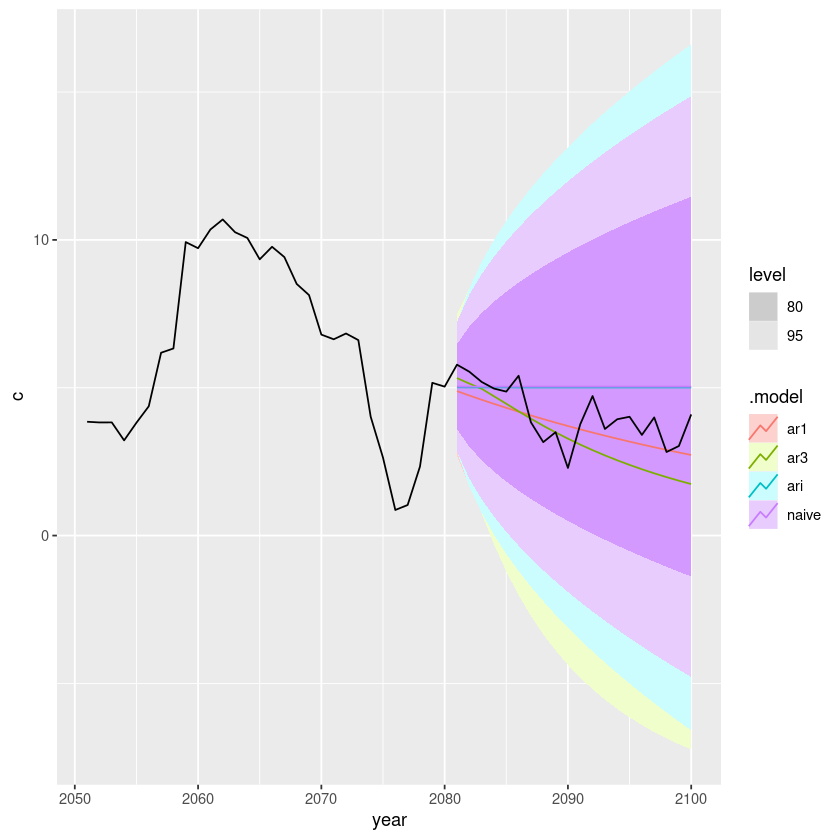

In [31]:
autoplot(fb, filter(data, year>2050))
autoplot(fc, filter(data, year>2050))
